# Functions for dealing with [dados.gov](dados.gov.pt)

In [1]:
def prepare_data(item, year):
    raw_data = pd.read_json(base_Url+item+year+end_Url)
    data = pd.DataFrame()
    for i in range(len(raw_data)): 
        series = pd.Series(raw_data.iloc[i][0])
        data[series['dscautarquia']] = series
    return data.T

In [2]:
def display_extremes(data, category):
    print '              ----------------\n'
    print '%s:' % category
    
    fig = data[category].sort_values(
        ascending=False).head(5).plot(kind='bar', rot=45, )
    plt.title('Largest 5 on %s' % category)
    plt.ylabel('% of total')
    plt.axhline(data.mean()[category], ls='--')
    fig.set_ylim(0,data[category].max()+5)
    plt.show()
    
    fig = data[category].sort_values(
        ascending=False).tail(5).plot(kind='bar', rot=45)
    plt.title('Smallest 5 on %s' % category)
    plt.ylabel('% of total')
    plt.axhline(data.mean()[category], ls='--')
    fig.set_ylim(0,data[category].max()+5)
    plt.show()

# Quick imports: 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline 

In [4]:
base_Url = 'http://servico.dados.gov.pt/v1/dgal/'
end_Url = '?&format=json'
despesa = 'AIIIDM'
receita = 'AIIRM'

In [5]:
year = ['2010', '2011', '2012', '2013', '2014']

In [6]:
despesa_2014 = prepare_data(despesa, '2014')

despesa_2014.drop(['Timestamp', 'RowKey', 'PartitionKey', 
                   'codigoperiodo', 'codigoine', 'ldk', 
                   'dscautarquia', 'entityid'], axis=1, inplace=True)

despesa_2014 = despesa_2014.convert_objects(convert_numeric=True)
despesa_2014_f = despesa_2014.div(despesa_2014['despesatotal'], axis='index')
despesa_2014_f = despesa_2014_f*100 
categories = list(despesa_2014_f.columns)
categories.remove('despesatotal')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


# Sources of income, by category, as percentage of total income:

              ----------------

acessibilidades:


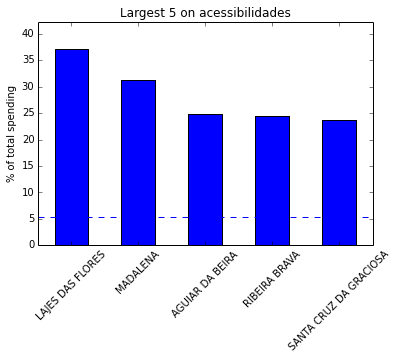

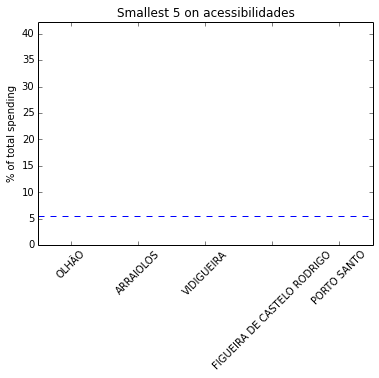

              ----------------

despesaaquisicaobens:


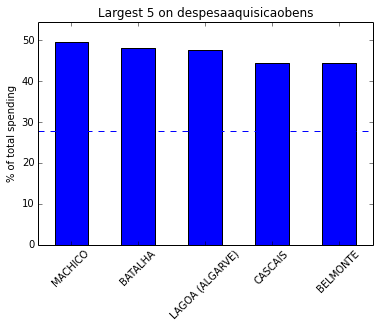

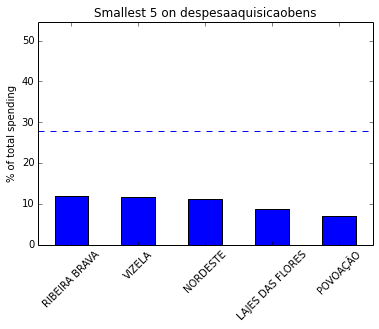

              ----------------

despesacompessoal:


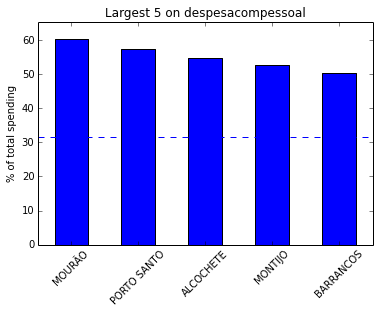

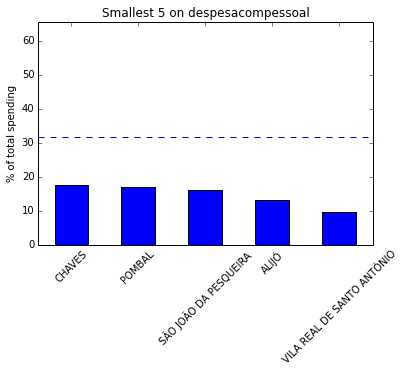

              ----------------

despesacorrente:


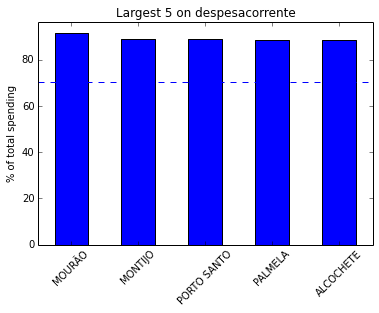

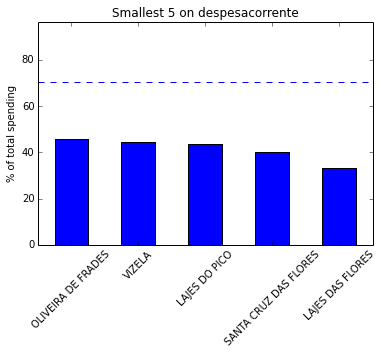

              ----------------

edificios:


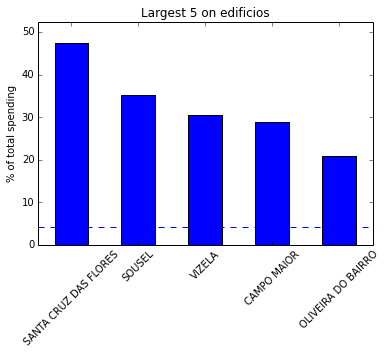

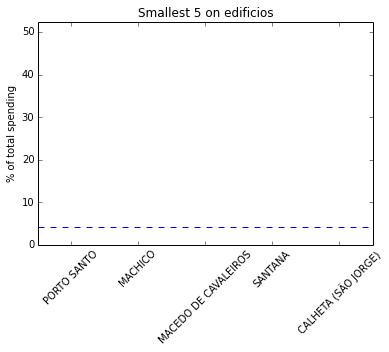

              ----------------

infraestruturasbasicas:


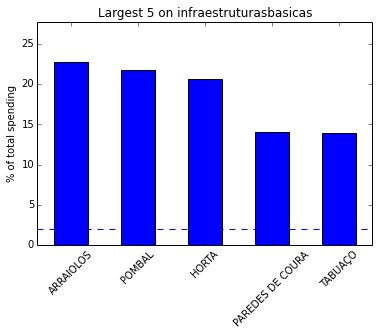

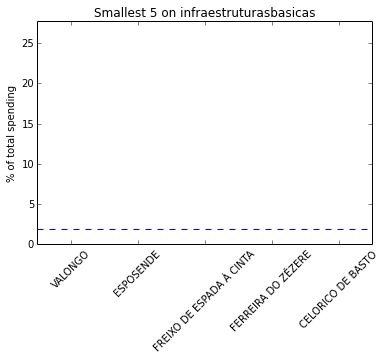

              ----------------

jurosencargos:


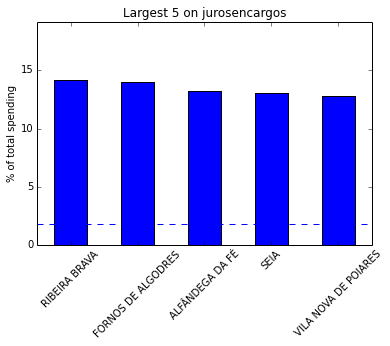

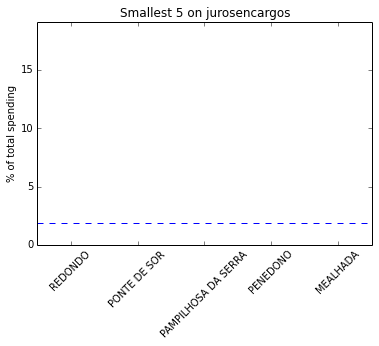

              ----------------

outrosinvestimentosbensdecapital:


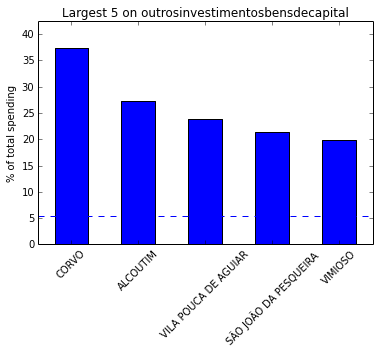

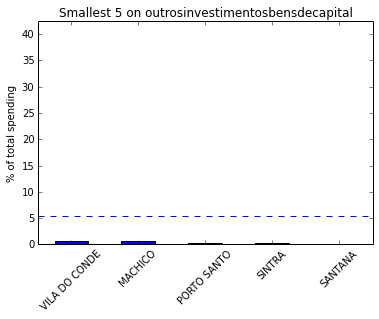

              ----------------

terrenoshabitacoes:


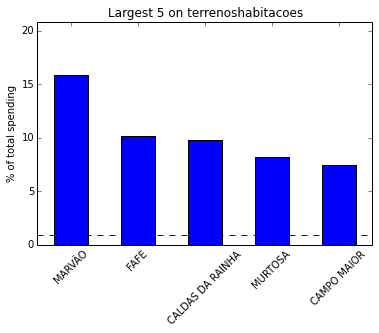

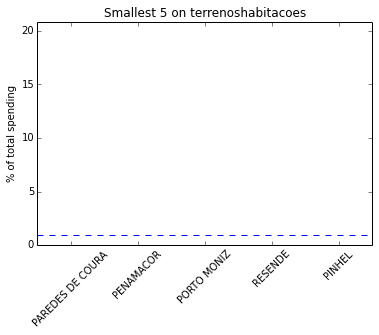

              ----------------

transferenciascorrentes:


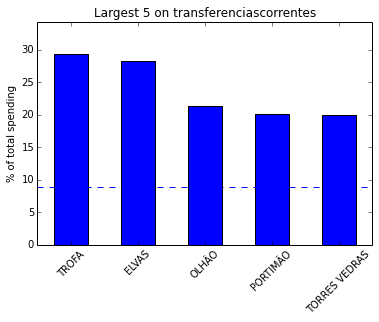

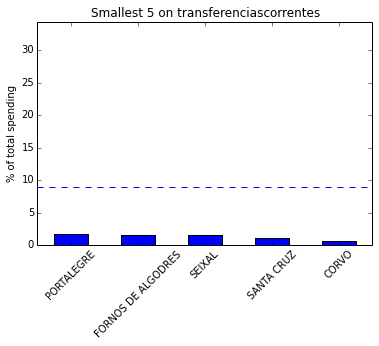

              ----------------

transferenciasoutrasdespesascapital:


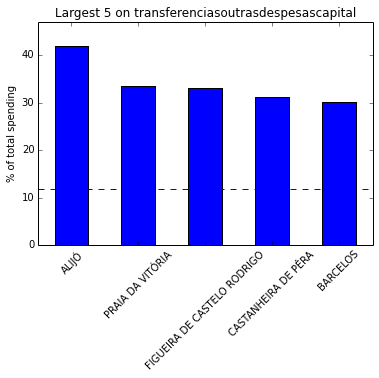

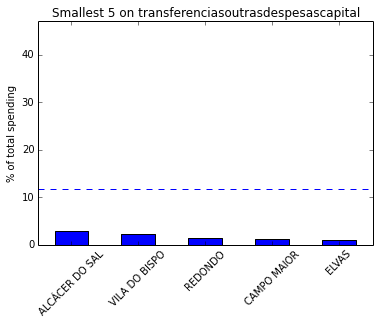

In [7]:
for category in categories: 
    display_extremes(despesa_2014_f, category)

In [8]:
receita_2014 = prepare_data(receita, '2014')

receita_2014.drop(['PartitionKey', 'codigoperiodo', 'RowKey', 'Timestamp', 'codigoine', 
                   'derramairc', 'dscautarquia', 'entityid', 'ldk'], 
                  axis=1, inplace=True)

receita_2014 = receita_2014.convert_objects(convert_numeric=True)
receita_2014 = receita_2014.div(receita_2014['receitastotais'], axis='index')
receita_2014 = receita_2014*100 
categories = list(receita_2014.columns)
categories.remove('receitastotais')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


# Sources of spending, by category, as percentage of total spending:

              ----------------

financiamentouniaoeuropeia:


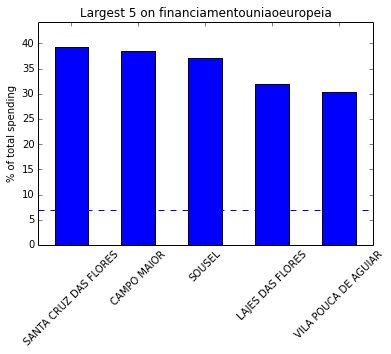

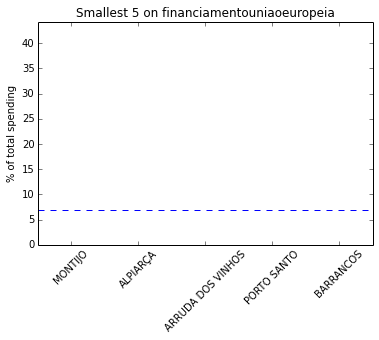

              ----------------

imi:


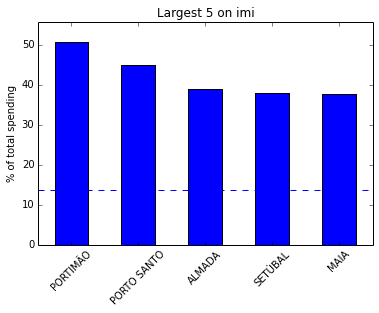

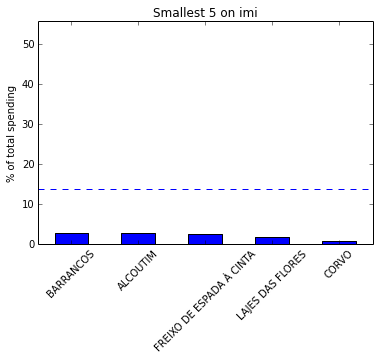

              ----------------

impostosmunicipais:


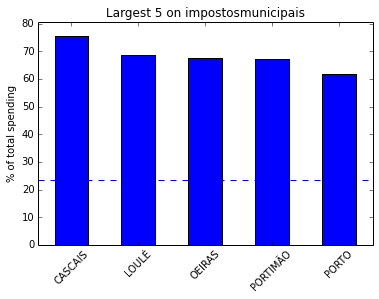

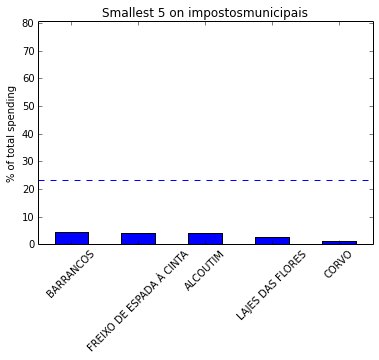

              ----------------

imt:


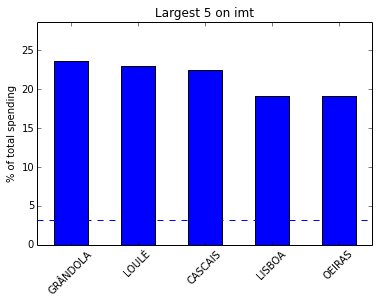

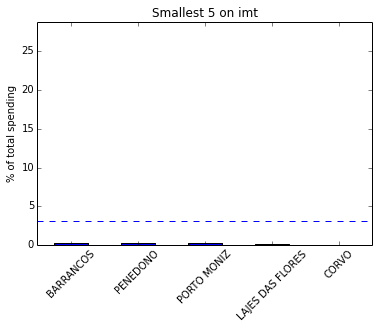

              ----------------

iuc:


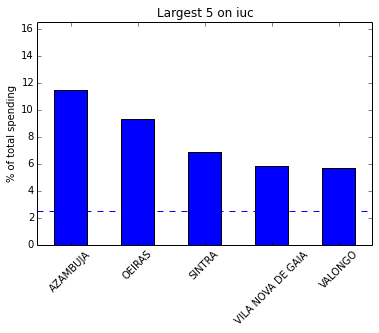

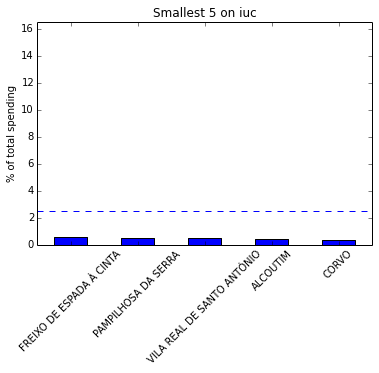

              ----------------

outrasreceitas:


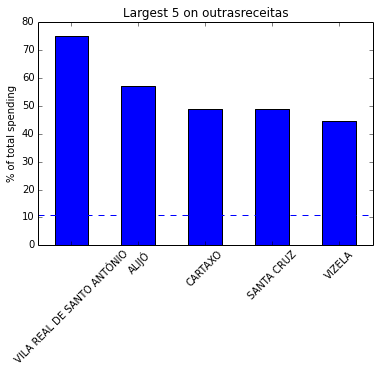

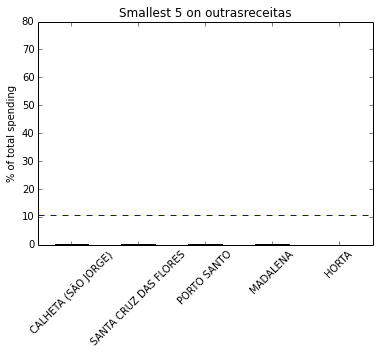

              ----------------

taxasmultasoutrosimpostos:


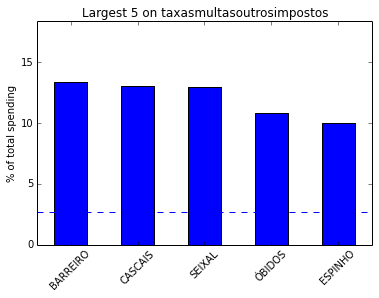

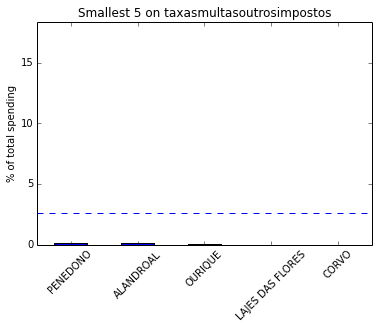

              ----------------

transferenciasorcamentoestado:


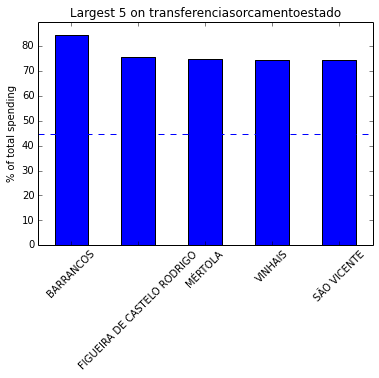

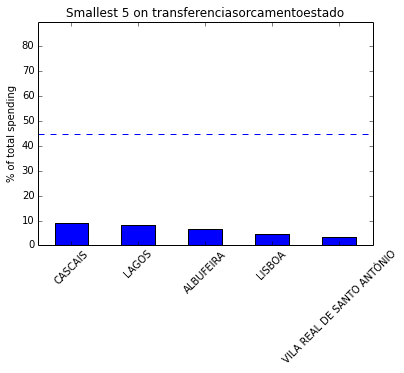

              ----------------

vendabensservicos:


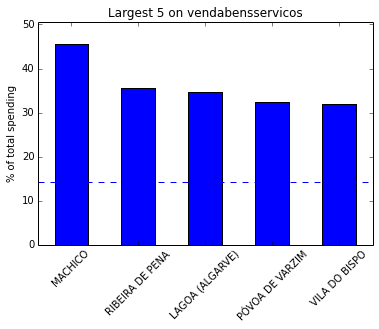

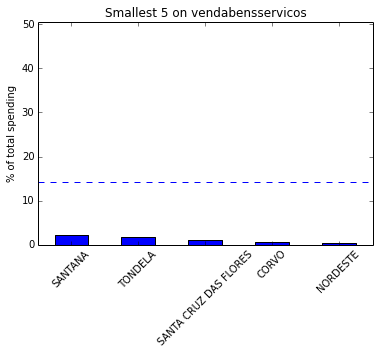

In [9]:
for category in categories: 
    display_extremes(receita_2014, category)